In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
training_set = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
training_set = training_set.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler() 
training_set = sc.fit_transform(training_set)

In [5]:
X_train = training_set[0:1257] 
y_train = training_set[1:1258]

In [6]:
X_train = np.reshape(X_train, (1257, 1, 1)) 

In [7]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 

In [8]:
regressor = Sequential() 
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1))) 
regressor.add(Dense(units = 1)) 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

C:\Users\rajka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0822
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0668
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0669
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0621
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0621
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0597
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0598
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0594
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0559
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0533
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0503
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0511
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0435
Epoc

In [10]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv') 
real_stock_price = test_set.iloc[:,1:2].values 


In [11]:
inputs = real_stock_price 
inputs = sc.transform(inputs) 
inputs = np.reshape(inputs, (20, 1, 1)) 
predicted_stock_price = regressor.predict(inputs) 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


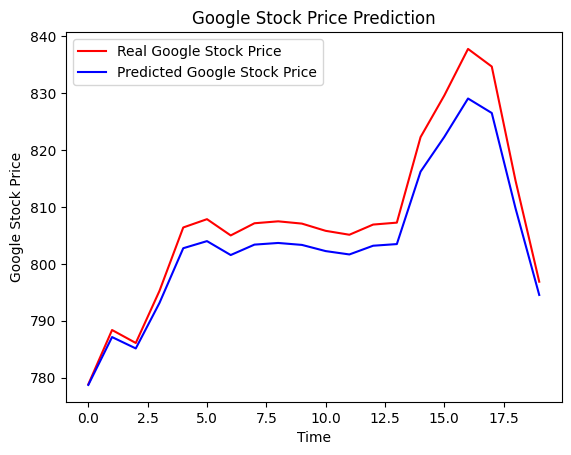

In [12]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price') 
plt.title('Google Stock Price Prediction') 
plt.xlabel('Time') 
plt.ylabel('Google Stock Price') 
plt.legend() 
plt.show()

In [14]:
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv') 
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values 

In [15]:
predicted_stock_price_train = regressor.predict(X_train) 
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train) 

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
